HoltWinters {stats},R Documentation
x,An object of class ts
alpha,alpha parameter of Holt-Winters Filter.
beta,"beta parameter of Holt-Winters Filter. If set to FALSE, the function will do exponential smoothing."
gamma,"gamma parameter used for the seasonal component. If set to FALSE, an non-seasonal model is fitted."
seasonal,"Character string to select an ""additive"" (the default) or ""multiplicative"" seasonal model. The first few characters are sufficient. (Only takes effect if gamma is non-zero)."
start.periods,Start periods used in the autodetection of start values. Must be at least 2.
l.start,Start value for level (a[0]).
b.start,Start value for trend (b[0]).
s.start,Vector of start values for the seasonal component (s_1[0] … s_p[0])
optim.start,"Vector with named components alpha, beta, and gamma containing the starting values for the optimizer. Only the values needed must be specified. Ignored in the one-parameter case."


      Qtr1  Qtr2  Qtr3  Qtr4
2005  7395 10424 10714  9514
2006  7807 11444 11547 10825
2007  8863 12639 12340 10818
2008  9436 17541 18443 14524
2009 11786 17623 16357 13616
2010 10973 17974 17708 13399
2011 12528 18740 17440 14853
2012 12874 19585 18810 15932
2013 12704 19058 17419 15169
2014 12896 19162 18120 14328
2015 13471 18931 18296 14656
2016 13011 18232 17534 13837
2017 13429 17747 16374 13105


        Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
2018 Q1       11850.32 10605.414 13095.22  9946.402 13754.23
2018 Q2       16478.41 14560.868 18395.95 13545.783 19411.03
2018 Q3       15862.75 13675.294 18050.21 12517.323 19208.19
2018 Q4       12977.03 11199.067 14755.00 10257.870 15696.19
2019 Q1       11731.97  9465.955 13997.98  8266.401 15197.53
2019 Q2       16313.42 13062.763 19564.09 11341.967 21284.88
2019 Q3       15703.53 12265.169 19141.90 10445.008 20962.06
2019 Q4       12846.45 10048.943 15643.96  8568.032 17124.87


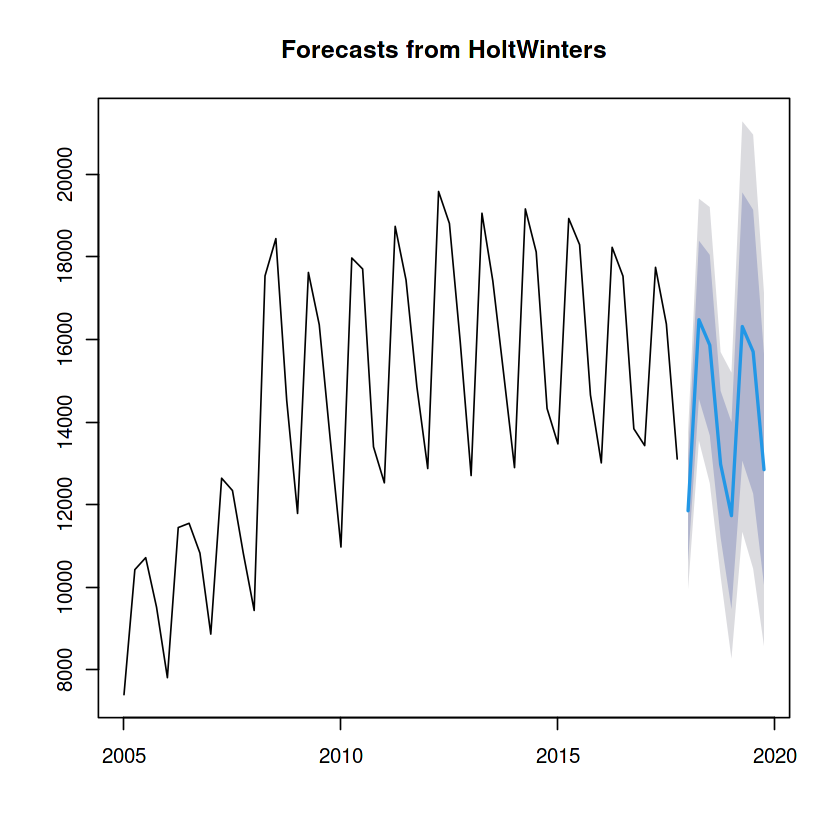

In [103]:
Total_net_revenue_in_millions_DDK<-ts(mysales, start=c(2005,1), end=c(2017,4), frequency=4)
mysales<-c(7395, 10424,10714,9514,7807,11444,11547,10825,8863,12639,12340,10818,9436,17541,18443,14524,11786,17623,16357,13616,10973,17974,17708,13399,12528,18740,17440,14853,12874,19585,18810,15932,12704,19058,17419,15169,12896,19162,18120,14328,13471,18931,18296,14656,13011,18232,17534,13837,13429,17747,16374,13105)
fit=HoltWinters(Total_net_revenue_in_millions_DDK, seasonal = "multiplicative")
print(Total_net_revenue_in_millions_DDK)
print(forecast(fit))
plot(forecast(fit))